Import the data as Ames


In [10]:
#import data to a df

import pandas as pd
ames = pd.read_csv('AmesHousing.csv')

Task 1:


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2930 non-null   int64  
 1   MSSubClass     2930 non-null   int64  
 2   MSZoning       2930 non-null   object 
 3   LotFrontage    2440 non-null   float64
 4   LotArea        2930 non-null   int64  
 5   Street         2930 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2930 non-null   object 
 8   LandContour    2930 non-null   object 
 9   Utilities      2930 non-null   object 
 10  LotConfig      2930 non-null   object 
 11  LandSlope      2930 non-null   object 
 12  Neighborhood   2930 non-null   object 
 13  Condition1     2930 non-null   object 
 14  Condition2     2930 non-null   object 
 15  BldgType       2930 non-null   object 
 16  HouseStyle     2930 non-null   object 
 17  OverallQual    

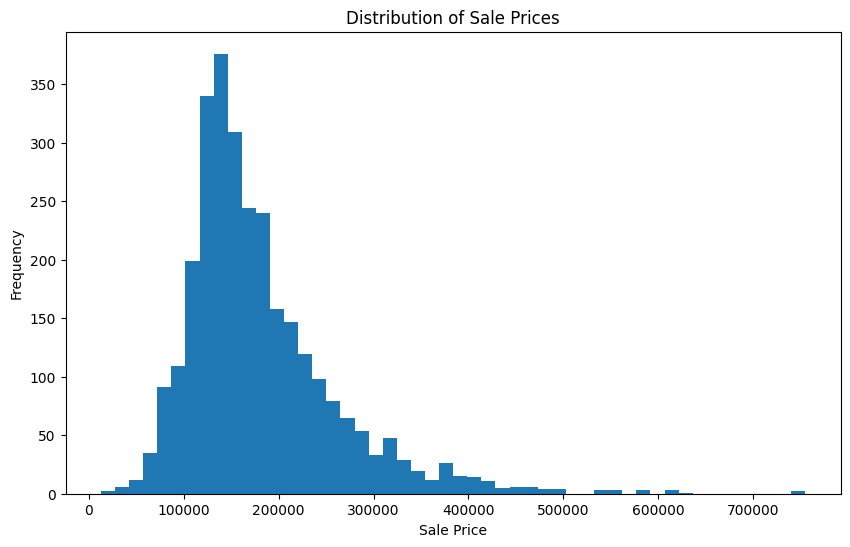

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Display basic information about the dataset
print("Basic information about the dataset:")
print(ames.info())

# Show the first few rows of the data
print("\n                 First 5 rows of the dataset:")
print(ames.head())

# Calculate and display summary statistics
print("\n                 Summary statistics of numerical columns:")
print(ames.describe())

# Count missing values
missing_values = ames.isnull().sum()
print("\n                 Columns with missing values:")
print(missing_values[missing_values > 0])

# Create a simple histogram of sale prices
plt.figure(figsize=(10, 6))
plt.hist(ames['SalePrice'], bins=50)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()



Task 2.

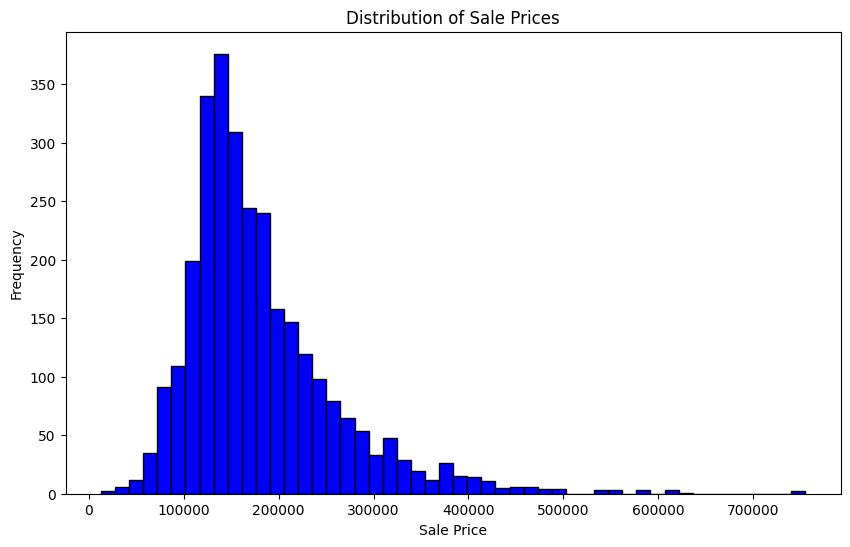

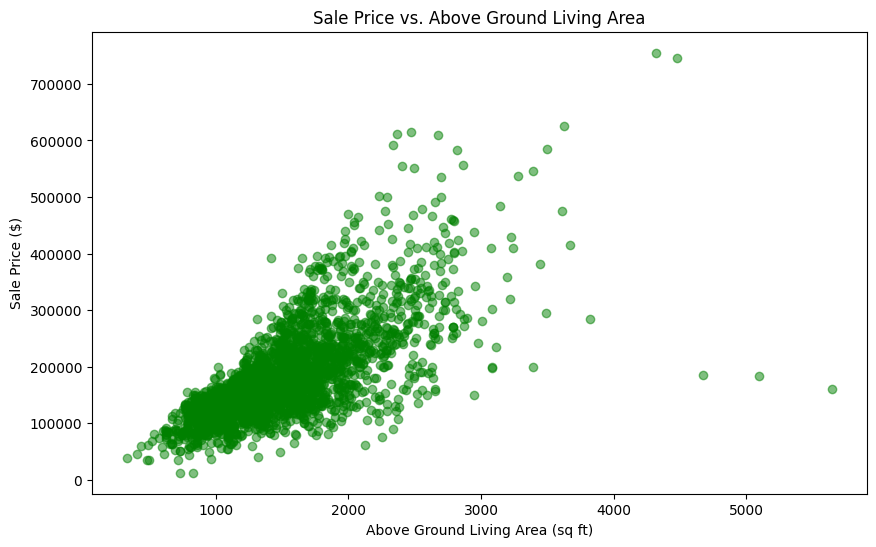

<ipython-input-15-e1e40dc785e4>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallQual', y='SalePrice', data=ames, palette='coolwarm')


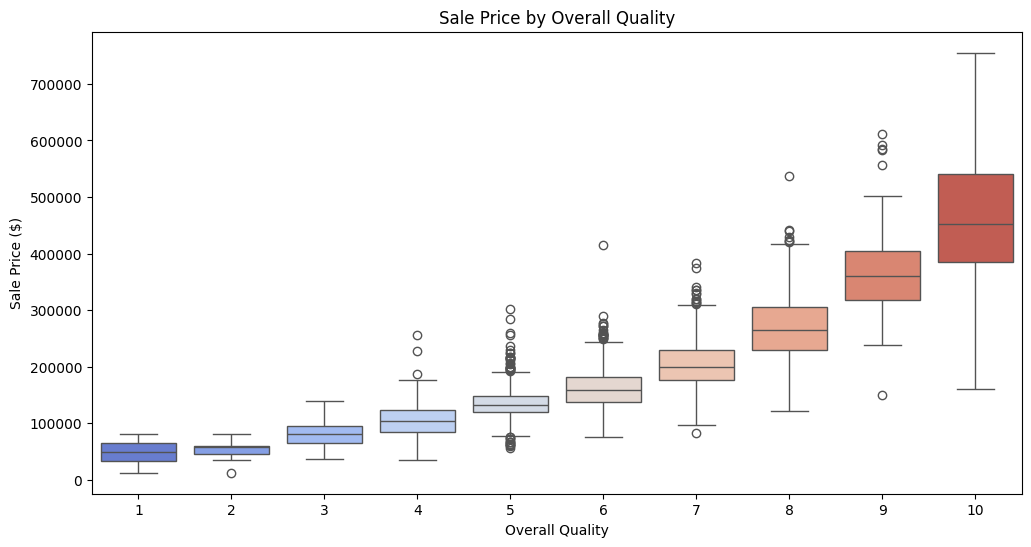

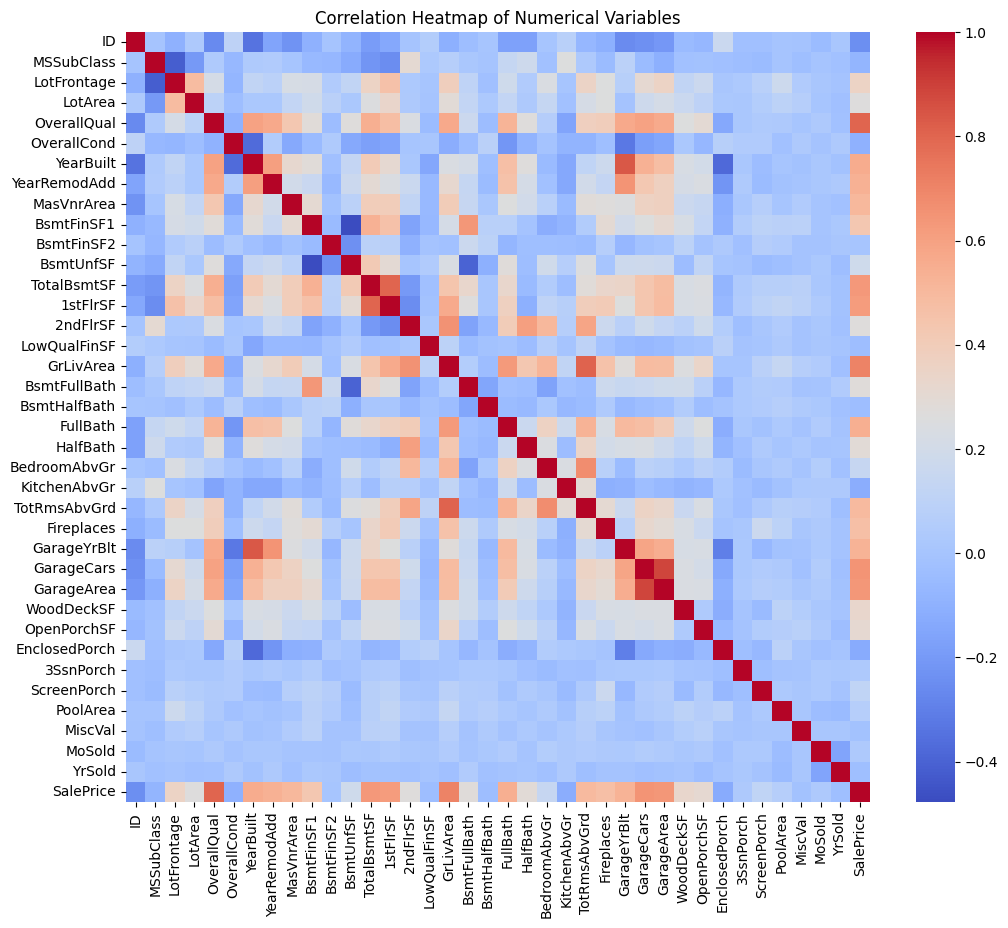

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#For correlation heat map
import seaborn as sns

# Assuming the data is already loaded into a DataFrame called 'ames'

# 1. Histogram of Sale Prices
plt.figure(figsize=(10, 6))
plt.hist(ames['SalePrice'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot: Above Ground Living Area vs Sale Price
plt.figure(figsize=(10, 6))
plt.scatter(ames['GrLivArea'], ames['SalePrice'], alpha=0.5, color='green')
plt.title('Sale Price vs. Above Ground Living Area')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.show()

# 3. Box plot: Overall Quality vs Sale Price
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=ames, palette='coolwarm')
plt.title('Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price ($)')
plt.show()

# 4. Correlation heatmap for numerical variables
correlation_matrix = ames.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


Task 3.

In [28]:
import pandas as pd
import numpy as np

# Load the dataset
ames = pd.read_csv("AmesHousing.csv")

# Handle missing values
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for col in categorical_columns:
    ames[col] = ames[col].fillna('None')

numerical_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                     'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

for col in numerical_columns:
    ames[col] = ames[col].fillna(0)

# Convert MSSubClass to string
ames['MSSubClass'] = ames['MSSubClass'].astype(str)




# Create new features
ames['TotalSF'] = ames['TotalBsmtSF'] + ames['1stFlrSF'] + ames['2ndFlrSF']
ames['TotalBathrooms'] = ames['FullBath'] + (0.5 * ames['HalfBath']) + ames['BsmtFullBath'] + (0.5 * ames['BsmtHalfBath'])
ames['HasBasement'] = (ames['TotalBsmtSF'] > 0).astype(int)
ames['HasGarage'] = (ames['GarageArea'] > 0).astype(int)
ames['Remodeled'] = (ames['YearRemodAdd'] != ames['YearBuilt']).astype(int)
ames['HouseAge'] = 2025 - ames['YearBuilt']


# Remove outliers
ames = ames[ames['GrLivArea'] < 4000]

# Print the shape of the final dataset
print("Final dataset shape:", ames.shape)




# Check for any remaining missing values
missing_values = ames.isnull().sum()
print("\n       Remaining missing values:")
print(missing_values[missing_values > 0])

#Check to see the remaning dataset

print(ames.head())
print(ames.columns)
ames.info()


#As we can se we have different types of variables

Final dataset shape: (2925, 87)

       Remaining missing values:
Series([], dtype: int64)
          ID MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  526301100         20       RL        141.0    31770   Pave  None      IR1   
1  526350040         20       RH         80.0    11622   Pave  None      Reg   
2  526351010         20       RL         81.0    14267   Pave  None      IR1   
3  526353030         20       RL         93.0    11160   Pave  None      Reg   
4  527105010         60       RL         74.0    13830   Pave  None      IR1   

  LandContour Utilities  ... YrSold SaleType SaleCondition SalePrice TotalSF  \
0         Lvl    AllPub  ...   2010      WD         Normal    215000  2736.0   
1         Lvl    AllPub  ...   2010      WD         Normal    105000  1778.0   
2         Lvl    AllPub  ...   2010      WD         Normal    172000  2658.0   
3         Lvl    AllPub  ...   2010      WD         Normal    244000  4220.0   
4         Lvl    AllPub  ...

Task 4.

Best explanatory variable: TotalSF
Lowest RMSE: 43990.25


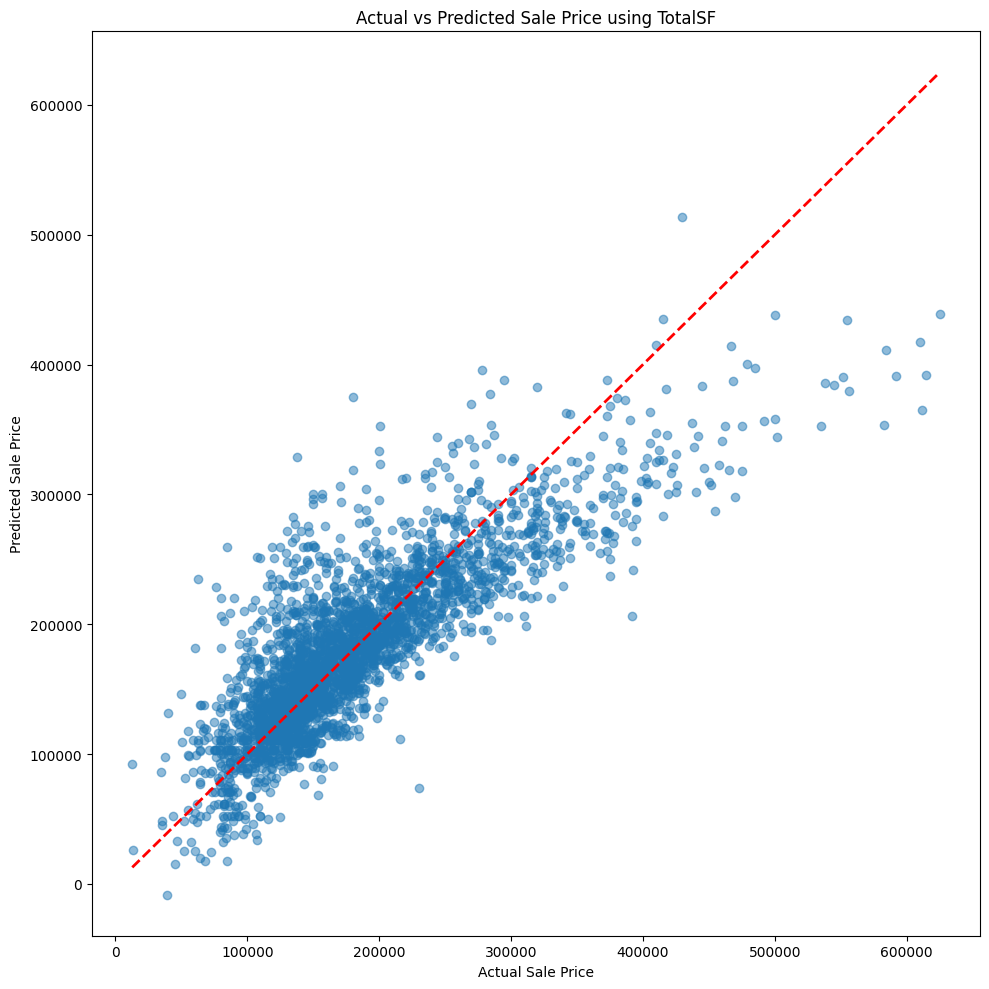

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Initialize variables to store results
best_rmse = float('inf')

best_variable = None
best_predictions = None

# Iterate through  columns
for column in ames.select_dtypes(include=[np.number]).columns:

    if column != 'SalePrice':
        X = ames[[column]]
        y = ames['SalePrice']

        # Fit linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Make predictions
        predictions = model.predict(X)

        # Calculate RMSE
        rmse = calculate_rmse(y, predictions)

        # Update best model if RMSE is lower
        if rmse < best_rmse:
            best_rmse = rmse
            best_variable = column
            best_predictions = predictions

print(f"Best explanatory variable: {best_variable}")
print(f"Lowest RMSE: {best_rmse:.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 10))
plt.scatter(ames['SalePrice'], best_predictions, alpha=0.5)
plt.plot([ames['SalePrice'].min(), ames['SalePrice'].max()],
         [ames['SalePrice'].min(), ames['SalePrice'].max()],
         'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title(f'Actual vs Predicted Sale Price using {best_variable}')
plt.tight_layout()
plt.show()


Task 5.

In completing this assignment, I utilized the following resources:
GitHub repositories from my own projects

Stack Overflow for troubleshooting specific coding issues

Handling missing values in pandas:

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

Creating new features in pandas:
https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

Plotting with matplotlib
https://stackoverflow.com/questions/14270391/how-to-plot-multiple-bars-grouped


Official documentation for Python libraries such as pandas, numpy, scikit-learn, and matplotlib to understand function usage and parameters.

The provided data description file for understanding the Ames Housing dataset variables and their meanings.
